Hier führen wir eine einfache Regression von zwei Features (also in zwei Dimensionen durch), da dies sich leichter visualisieren lässt. Tatsächlich ist man aber in der Anzahl an Features nicht eingeschränkt. Ziel ist es ein Regression-Model zu erstellen, in dem man einen numerischen Eingabe-Wert (x) eingibt und einen numerischen Ausgabe-Wert (y) erhält.

Wir erzeugen und ein künstlichen Datenset von 500 Datenpunkten mit Hilfe der Funktion make_regression. Mit dem Parameter noise können wir angeben, wie verauscht die Daten sein sollen.

In [1]:
from sklearn.datasets import make_regression
X_reg, y_reg = make_regression(n_samples=500, n_features=1, noise=20, random_state=1)

In [2]:
X_reg

array([[-1.91835552e-01],
       [-5.37223024e-01],
       [ 5.64382855e-01],
       [ 1.93752881e+00],
       [ 1.20205486e+00],
       [-2.43483776e+00],
       [ 2.10025514e+00],
       [ 1.00088142e+00],
       [-7.67309826e-01],
       [-7.77858827e-01],
       [-1.09991490e-01],
       [-4.48738033e-01],
       [ 6.74570707e-01],
       [ 1.74481176e+00],
       [-2.26314243e-01],
       [ 1.62765075e+00],
       [ 3.69492716e-01],
       [ 8.25029824e-01],
       [ 8.65407629e-01],
       [ 3.67231814e-01],
       [ 7.78211279e-02],
       [ 1.04444209e+00],
       [ 8.52704062e-01],
       [ 5.82815214e-01],
       [-6.70662286e-01],
       [ 5.92472801e-01],
       [ 4.41364444e-01],
       [-2.46169559e-02],
       [ 1.38877940e+00],
       [ 4.77610182e-01],
       [ 1.61694960e+00],
       [-7.00398505e-01],
       [ 1.62284909e+00],
       [ 1.04008915e+00],
       [ 3.86539145e-01],
       [ 2.19069973e+00],
       [ 2.11124755e-01],
       [ 8.38983414e-01],
       [-3.5

Blick auf die Daten

In [3]:
X_reg.shape


(500, 1)

Länge des Ziel-Vektors

In [4]:
y_reg.shape

(500,)

Wir können die Daten zweidimensional plotten. Die x-Achse stellt die Eingangswerte dar, die y-Achse die davon abhängigen Werte. Mit X_reg[:, 0] wird die erste und einzige Spalte, der prinzipiel n-dimensionalen Input-Werte-Matrix genutzt.

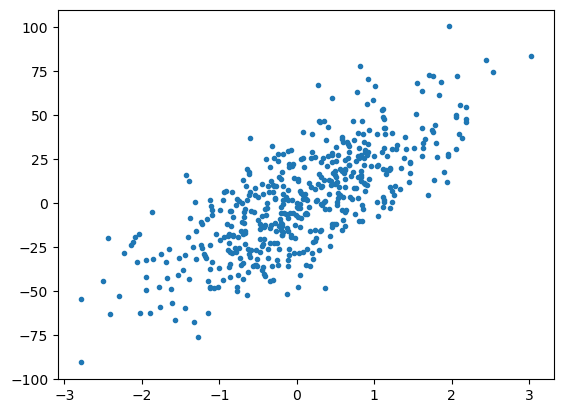

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_reg[:, 0], y_reg, ".")

Wir möchten für diese Daten eine lineares Regression-Modell erstellen, laden dafür die nötige Klasse und erstellen eine Instanz davon. Noch einmal zur Erinnerung - ein lineare Modell wir durch folgende Formel beschrieben:

y = w_1 * x_1 + w_2 * x_2 + … + w_n * x_n + b

Beim Fitten werden die w-Parameter und der b-Parameter mit Werten versehen.

In [6]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

Wir teilen unsere Daten für eine spätere Bewertung der Güte in ein Trainings- und ein Testset auf.

In [7]:
from sklearn.model_selection import train_test_split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg)


Das Fitting der Parameter erfolg mit der Methode fit.

In [8]:
linear_regression.fit(X_reg_train, y_reg_train)

LinearRegression()

Wir können uns jetzt die Koeffizienten also in diesem nut Fall w_1 anschauen. Die Gerade hat also die Steigung 21.4.

In [9]:
linear_regression.coef_

array([22.21789822])

Zudem gibt es noch den y-Achsen-Abschnit bei 0 (Intercept).

In [10]:
linear_regression.intercept_

0.011958322432102486

Wir können nun die Trainingsdaten und die Gerade, die das lineare Modell repräsentiert, in einem Plot darstellen.

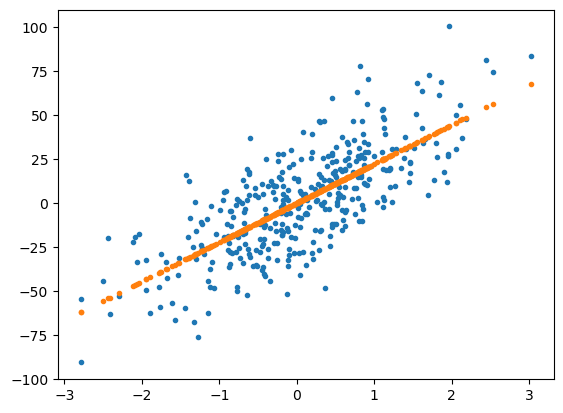

In [11]:
plt.plot(X_reg_train, y_reg_train, ".")
y_lm_predicted = linear_regression.predict(X_reg_train)
plt.plot(X_reg_train, y_lm_predicted, ".")

Dieses trainierte Modell kann nun auf neue Werte angewandt werden. Zum Beipiel unserer Test-Datenset:

In [12]:
linear_regression.predict(X_reg_test)

array([ 17.62646058,  13.02965665,   0.20189792, -10.40098883,
        -7.09336105, -43.16460332,  24.94773474,   3.94869706,
         8.22130989,  15.12168081, -13.88182662,  23.22953776,
        -4.92770572,  23.21726648, -12.37440267, -31.01525513,
        -6.24762943, -24.75813325, -16.90045913,  13.39422679,
         8.97669455,  21.92625314, -32.67405652, -24.8524337 ,
        -7.34845743,  -5.01626848,  -3.72506638, -15.35528986,
        -8.52092224,   5.36063054,  36.06825414,  11.7953421 ,
        23.12055327,  -8.53820541,  -1.33561257,  27.84805548,
        -5.27461139, -22.69219959, -13.01937085,  19.47125848,
       -11.28489054,  -1.25056221,  45.90932188,  26.86131804,
        -2.39628559,  -5.07073758, -19.26844987, -26.25666548,
       -15.57044076,   3.56764564, -44.91710247,  22.97830795,
        19.67793462, -36.66359875,  -7.6529324 , -22.20969894,
        25.79224257,   7.02470346,  46.67521318,  -4.32180582,
       -36.14630109, -24.44148654,  15.17681601,   3.77

Für das Testdatenset kennen wir die tatsächlichen y-Werte und können mit der Methode score eine Vorraussage durchführen und diese mit den Werten vergleichen um die Güte der Voraussage zu bewerten.

In [13]:
linear_regression.score(X_reg_test, y_reg_test)

0.5844871035368226

Das gleiche Vorgehene können wir nun mit anderen Regression-Methoden nutzen. Zum Beispiel mit der SVM-Methode

In [14]:
from sklearn.svm import SVR
svm_regression = SVR()
svm_regression.fit(X_reg_train, y_reg_train)
svm_regression.score(X_reg_test, y_reg_test)

0.4953566765339811